# M2 Capstone Project

## Project Overview

This project aims to analyze two datasets containing factors that contribute to overall happiness within a given country. The first goal is to observe the different features in the datasets, and draw some initial relationships that could contribute to the production of a machine learning model. With these relationships illustrated, two machine learning models will be developed and compared such that final predictions will made with the best performing one.

Order of operations for this project.

1. Exploratory Data Analysis
2. a) Data Visualization
   b) Initial Comments
3. Feature Engineering and Model Building
4. Model Comparison & Analysis
5. Final Model & Predictions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Exploratory Data Analysis

In [5]:
# Importing 1st DataFrame (2006-2020)

df1 = pd.read_csv('/Users/AlexandreRioux/Desktop/world-happiness-report.csv')
df1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [6]:
# Loading 2nd DataFrame (Values from 2021)
df2 = pd.read_csv('/Users/AlexandreRioux/Desktop/world-happiness-report-2021.csv')
df2

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


**Unlike the previous dataset, df2 contains similar information pertaining to the happiness report, but only for the year 2021.
Similar connections can be made even though columns are different or do not exist in both sets.**

In [8]:
# Exploring 1st DataFrame
print(df1.info()) # Only 'Country name' is a string
print('-' * 50)
print(df1.describe())
print('-' * 50)
print(df1.sample(5))
print('-' * 50)
print(df1.isna().sum()) # Quite a few missing values in many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB
None
-----

In [9]:
df1[df1['Log GDP per capita'].isna()]
# Dropping a few singular rows where one country is concerned.
df1.drop([423, 436, 709, 918, 1087],  inplace=True)
# Keeping the remaining entries where a country is counted more than once.

In [10]:
df1['Log GDP per capita'] = df1['Log GDP per capita'].fillna(df1['Log GDP per capita'].median()) # Filling with median values.
df1['Log GDP per capita'].isna().sum() # Using median values to minimize the variance over time, or if the column is NaN.

0

In [11]:
df1[df1['Social support'].isna()] # Filling with median values
df1['Social support'] = df1['Social support'].fillna(df1['Social support'].median())
df1['Social support'].isna().sum() # Using median values to minimize the variance over time, or if the column is NaN.

0

In [12]:
df1[df1['Healthy life expectancy at birth'].isna()] # Certain countries never have a value for this column.
# This seems to be an important column. The best I can do is obtain the latest value for that particular country.
# Need to find values for Hong Kong, Kosovo, North Cyprus, Palestinian Territories, Somaliland region, and Taiwan Province of China.

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
699,Hong Kong S.A.R. of China,2006,5.511,10.746,0.812,NaN,0.910,0.156,0.356,0.723,0.236
700,Hong Kong S.A.R. of China,2008,5.137,10.816,0.840,NaN,0.922,0.296,0.274,0.719,0.237
701,Hong Kong S.A.R. of China,2009,5.397,10.788,0.835,NaN,0.918,0.308,0.272,0.762,0.210
702,Hong Kong S.A.R. of China,2010,5.643,10.847,0.857,NaN,0.890,0.332,0.256,0.710,0.183
703,Hong Kong S.A.R. of China,2011,5.474,10.887,0.846,NaN,0.894,0.235,0.245,0.734,0.196
704,Hong Kong S.A.R. of China,2012,5.484,10.893,0.826,NaN,0.880,0.222,0.380,0.715,0.183
705,Hong Kong S.A.R. of China,2014,5.458,10.940,0.834,NaN,0.843,0.224,0.423,0.684,0.243
706,Hong Kong S.A.R. of China,2016,5.498,10.970,0.832,NaN,0.800,0.100,0.403,0.664,0.213
707,Hong Kong S.A.R. of China,2017,5.362,11.000,0.831,NaN,0.831,0.140,0.416,0.640,0.201
708,Hong Kong S.A.R. of China,2019,5.659,11.000,0.856,NaN,0.727,0.067,0.432,0.599,0.358


In [13]:
# Creating a list of these countries to search for values over the years
countries = [
    'Hong Kong S.A.R. of China', 'Kosovo', 'North Cyprus', 
    'Palestinian Territories', 'Somaliland region', 'Taiwan Province of China']
# Many of these countries do not have any information over the entire dataset. Only a few of them have any inputs. Taking what can be found.
df_2006 = df1.loc[(df1['year'] == 2006) & (df1['Country name'].isin(countries))]
df_2006
# Recording findings: Palestinian Territories: 61.78, Taiwan: 68.68
# Among these countries missing the value for this column, none of them appear in other years or they are simply undocumented.
# Proceeding with changing the value for Palestinian Territories and Taiwan. Filling with mean for the rest.

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
699,Hong Kong S.A.R. of China,2006,5.511,10.746,0.812,NaN,0.910,0.156,0.356,0.723,0.236
1325,Palestinian Territories,2006,4.716,8.213,0.818,61.78,0.547,NaN,0.858,0.497,0.431
1669,Taiwan Province of China,2006,6.189,10.613,0.882,68.68,0.630,-0.030,0.846,0.814,0.094


In [14]:
# Replacing values for following years with a recorded one.
df1.loc[df1['Country name'] == 'Palestinian Territories', 'Healthy life expectancy at birth'] = 61.78
df1.loc[df1['Country name'] == 'Taiwan Province of China', 'Healthy life expectancy at birth'] = 68.68

In [15]:
# Filling remaining missing values with the mean for this column.
df1['Healthy life expectancy at birth'] = df1['Healthy life expectancy at birth'].fillna(df1['Healthy life expectancy at birth'].mean())
df1['Healthy life expectancy at birth'].isna().sum() # Because this is a major column, I want to keep the data. Using world mean.

0

In [16]:
df1[df1['Freedom to make life choices'].isna()] # Filling with median values
df1['Freedom to make life choices'] = df1['Freedom to make life choices'].fillna(df1['Freedom to make life choices'].median())
df1['Freedom to make life choices'].isna().sum() # Using median values to minimize the variance over time, or if the column is NaN.

0

In [17]:
df1[df1['Generosity'].isna()] # Filling with median values
df1['Generosity'] = df1['Generosity'].fillna(df1['Generosity'].median())
df1['Generosity'].isna().sum() # Using median values to minimize the variance over time, or if the column is NaN.

0

In [18]:
df1[df1['Perceptions of corruption'].isna()] # By far the most missing values are contained here. 
# Dropping this column because many of the same countries do not hold a record of this value. 
df1.drop(columns=['Perceptions of corruption'], inplace=True)

In [19]:
df1.isna().sum() # Checking in on missing values. Still a couple columns to fill in.

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Positive affect                     22
Negative affect                     16
dtype: int64

In [20]:
df1[df1['Positive affect'].isna()] # Filling with the mean
df1['Positive affect'] = df1['Positive affect'].fillna(df1['Positive affect'].mean())
df1['Positive affect'].isna().sum()

0

In [21]:
df1[df1['Negative affect'].isna()] # Filling with the mean
df1['Negative affect'] = df1['Negative affect'].fillna(df1['Negative affect'].mean())
df1['Negative affect'].isna().sum()

0

In [22]:
df1.isna().sum() # No more missing values

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Positive affect                     0
Negative affect                     0
dtype: int64

In [23]:
df2.isna().sum() # This DataFrame does not have any missing values

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

### 2. A) Visualization

*Creating a list of sample countries within different areas of the world to compare Happiness Score vs. Time*

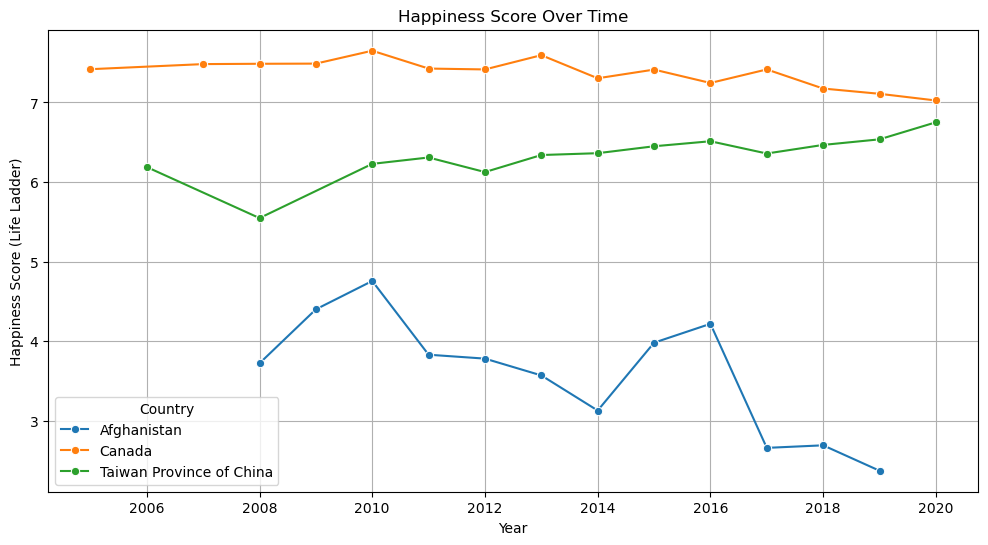

In [26]:
sample_countries = ['Afghanistan', 'Canada', 'Taiwan Province of China']
df_sample = df1[df1['Country name'].isin(sample_countries)]

# Configuring Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sample, x='year', y='Life Ladder', hue='Country name', marker='o')
plt.title('Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

**Canada: slight worsening over time<br>Taiwain: slight increase over time<br> Afghanistan: Inconsistencies, but general downward trajectory.**

*Creating a chart that evaluates if GDP per capita has any incidence on the Happiness Rating among all data.*

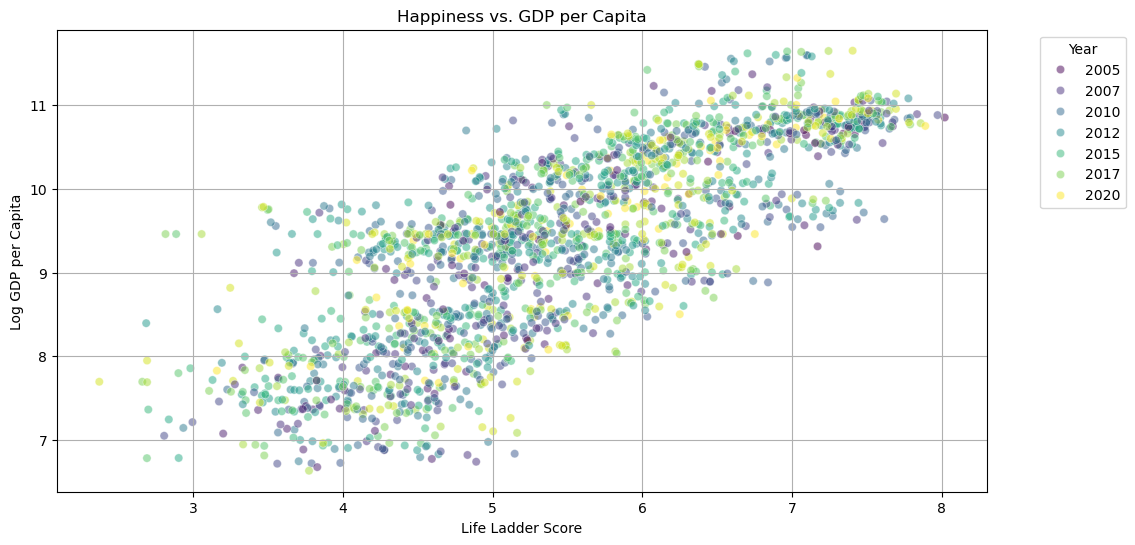

In [29]:
# Configuring Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Life Ladder', y='Log GDP per capita', hue='year', palette='viridis', alpha=0.5)
plt.title('Happiness vs. GDP per Capita')
plt.xlabel('Life Ladder Score')
plt.ylabel('Log GDP per Capita')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

**We can assume from this representation of the data that there is a positive correlation between GDP per capita and Life Ladder Score (Happiness Score)**

*Let's visualize how many countries are situated at each level of happiness score.*

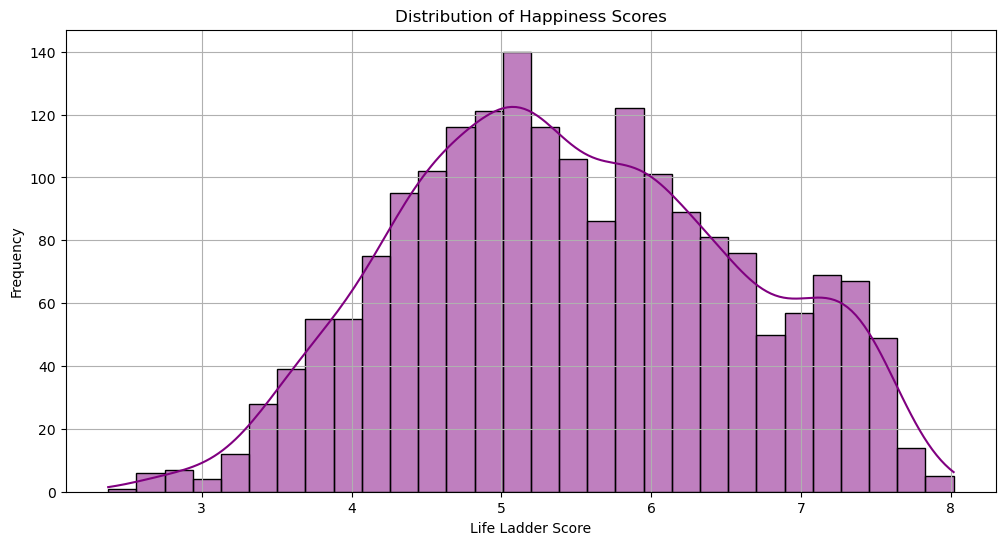

In [32]:
# Configuring Plot
plt.figure(figsize=(12, 6))
sns.histplot(df1['Life Ladder'], bins=30, kde=True, color='purple')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Life Ladder Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Data seems to show somewhat of a standard distribution (Bell Curve) with slightly skewed to more positive scores.**

*And finally, let's visualize the top and bottom 10 countries with regards to Life Ladder Score from the most current data*

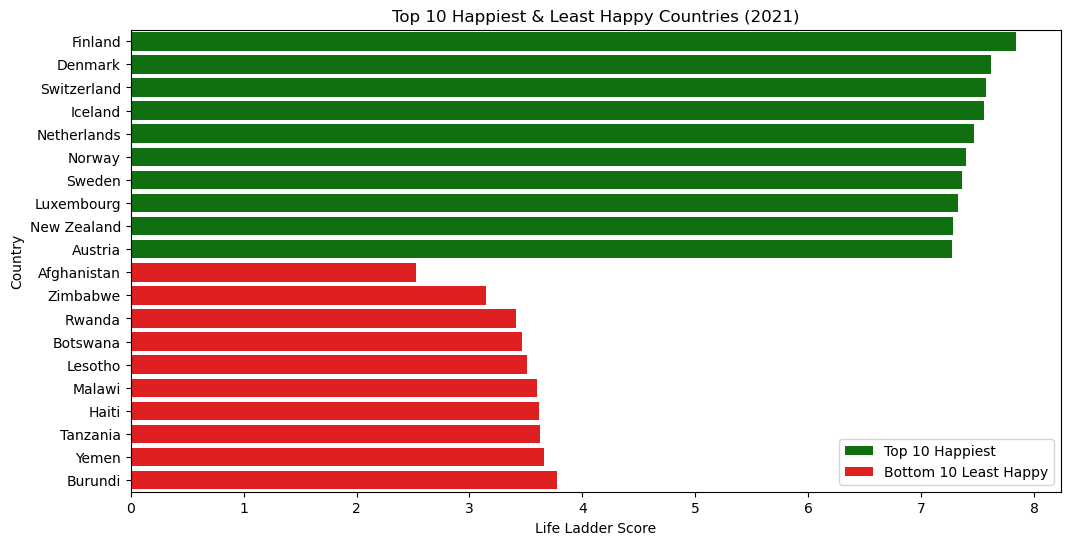

In [35]:
# Compiling countries from the most recent DataFrame (df2)
top_10 = df2.nlargest(10, 'Ladder score')
bottom_10 = df2.nsmallest(10, 'Ladder score')
# Configuring Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Ladder score', y='Country name', color='green', label='Top 10 Happiest')
sns.barplot(data=bottom_10, x='Ladder score', y='Country name', color='red', label='Bottom 10 Least Happy')
plt.title('Top 10 Happiest & Least Happy Countries (2021)')
plt.xlabel('Life Ladder Score')
plt.ylabel('Country')
plt.legend()
plt.show()

### 2. B) Initial Comments

Among all visualizations, a few preliminary relationships can be drawn:
- Higher GDP per capita leads to a higher happiness score.
- Most of the world's population seem to have an average to above average happiness score (rough generalization).
- The top performing countries are mostly all in Europe and belonging to Nordic countries, while the majority of the least performing countries are of African/Arabic origin.

### 3. Feature Engineering and Model Building

The models I have opted to select are Linear Regression and Random Forest Regression. I want to evaluate both of these models; one being simpler, and the other more robust. Linear Regression will be scaled and Random Forest does not need scaling, so I can roughly capture and compare these vastly different models based on each other's strengths.<br>
LR: Linearity, scales, assumes relatinship between target variable and features, low overfitting risk.<br>
RF: Captures non-linearity, does not require scaling to perform, more complex modelling.<br>

I want to evaluate the happiness metric, so the target variable will be 'Life Ladder' with all other features helping the model perform.

In [38]:
# Splitting X and y (target variable 'Life Ladder')
from sklearn.model_selection import train_test_split

X = df1[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'year', 
         'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect']]
y = df1['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X.shape, y.shape)
print('-' * 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1944, 8) (1944,)
--------------------------------------------------
(1555, 8) (389, 8) (1555,) (389,)


*Opting not to use the 'Country name' column to prevent overfitting. Will transform this data differently when using the final model*

In [40]:
df1_copy = df1.drop(columns=['Country name'])

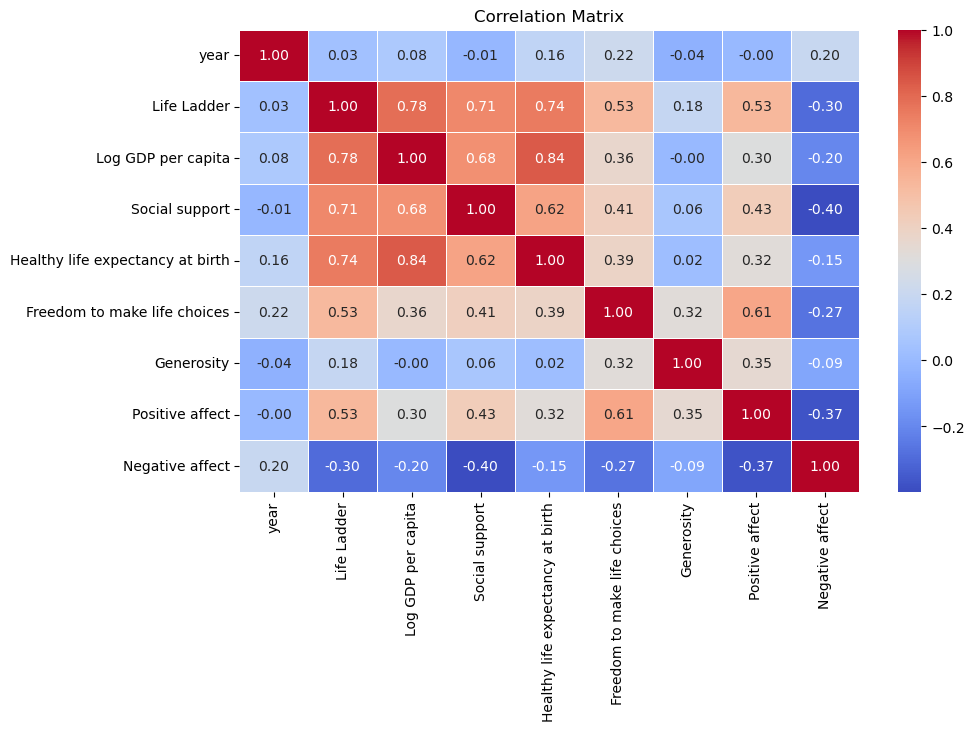

In [41]:
# Finding correlation within the features
corr_matrix = df1_copy.corr()

# Heatmapping
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Performing Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train) 
y_pred = lr_model.predict(scaled_X_test)

In [44]:
# Evaluating metrics
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f'This is the mean absolute error: {mae_lr}')
print('-' * 50)
print(f'This is the mean_squared_error:, {mse_lr}')
print('-' * 50)
print(f'This is the R² Score: {r2_lr}')

This is the mean absolute error: 0.4211097501295038
--------------------------------------------------
This is the mean_squared_error:, 0.28987133760606587
--------------------------------------------------
This is the R² Score: 0.7623232195335404


**Performing Random Forest Regression**

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Using a basic form of Random Forest prior to tuning for final model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

In [47]:
# Evaluating metrics
mae_rf = mean_absolute_error(y_test, rf_y_pred)
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f'This is the mean absolute error: {mae_lr}')
print('-' * 50)
print(f'This is the mean_squared_error: {mse_rf}')
print('-' * 50)
print(f'This is the R² Score: {r2_rf}')

This is the mean absolute error: 0.4211097501295038
--------------------------------------------------
This is the mean_squared_error: 0.1509079272583548
--------------------------------------------------
This is the R² Score: 0.8762647228461892


### 4. Model Comparison & Analysis

The cell below holds the values comparing both models.<br> Across the board, the Random Forest Regression Model outperforms the Linear Regression model in every metric. This could be due to the non-linear nature of the data outside of GDP per capita, for example, which was seen as positively correlated.

In [49]:
print('Model Performance Comparison:')
print(f'Linear Regression - MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}')
print(f'Random Forest - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}')

Model Performance Comparison:
Linear Regression - MAE: 0.4211, MSE: 0.2899, R²: 0.7623
Random Forest - MAE: 0.2940, MSE: 0.1509, R²: 0.8763


**Plotting a chart that displays the performance of both regression models**

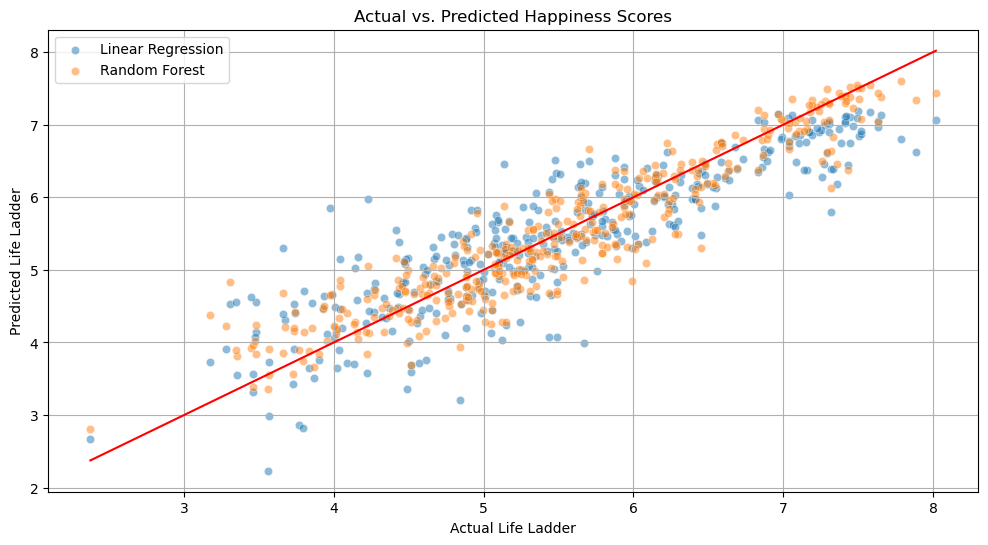

In [51]:
# Configuring comparison plot
plt.figure(figsize=(12, 6))

# Linear Regression Predictions
sns.scatterplot(x=y_test, y=y_pred, label='Linear Regression', alpha=0.5)

# Random Forest Predictions
sns.scatterplot(x=y_test, y=rf_y_pred, label='Random Forest', alpha=0.5)

#Combining both plots
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs. Predicted Happiness Scores')
plt.legend()
plt.grid()
plt.show()

**Overall we can observe that there are far more blue dots away from the center of the line which is due in large part to the evaluation metrics in the Linear Regression model being lower.<br> Because of this, the Random Forest is likely the better choice as it will produce a prediction with more accuracy**

### 5. Final Model and Predictions

In [85]:
# Retraining the best model on the full dataset.
final_model = RandomForestRegressor(n_estimators=100, random_state=1)
final_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [101]:
# Finding a point to use for prediction
df2[df2['Country name'] == 'Canada']
# Using a point from df2 that has been unseen at this point.
# This dataset contains information from the year 2021.

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
13,Canada,North America and ANZ,7.103,0.042,7.185,7.021,10.776,0.926,73.8,0.915,0.089,0.415,2.43,1.447,1.044,0.798,0.648,0.246,0.335,2.585


In [103]:
pred_data = {
    'Log GDP per capita': 10.776,
    'Social support': 0.926,
    'Healthy life expectancy at birth': 73.8,
    'year': 2021,
    'Freedom to make life choices': 0.915,
    'Generosity': 0.089,
    'Positive affect': 0.817, # Inventing this point
    'Negative affect': 0.283 # Inventing this point
}

# Creating dataframe with these inputs.
pred_df = pd.DataFrame([pred_data])

# Prediction
predicted_life_ladder = final_model.predict(pred_df)
print(f"Predicted Life Ladder score: {predicted_life_ladder[0]:.2f}")

Predicted Life Ladder score: 7.18


### Closing Thoughts

In conclusion, the final chosen model has predicted quite accurately what the life ladder score the second dataframe contained!<br> The model predicted an outcome of 7.18 Life Ladder Score compared to 7.103 from the actual value from unseen data. <br>
When entering personal inputs, I chose to predict the happiness score for Canada because that's where I live. In these turbulent, sociopolitical times, I want to evaluate if Canadians will still believe that we are an amazing country to grow in. <br> I've always believed that Canadians aspire to be in the upper echelon of global citizens, so this prediction is personal to me. <br>

Although the dataset that this model is based off of contains subjective data; the predicted happiness score is extremely close to its 2021 evaluation. This leads me to believe that there is a likely chance that Canadians will hold fast to the changes we are faced with this year. 